# HOUSE PRICE PREDICTION

In [163]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [164]:
#importing data
data = pd.read_csv('Raw_Housing_Prices.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


# Data Preprocessing

In [165]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

<Axes: ylabel='Frequency'>

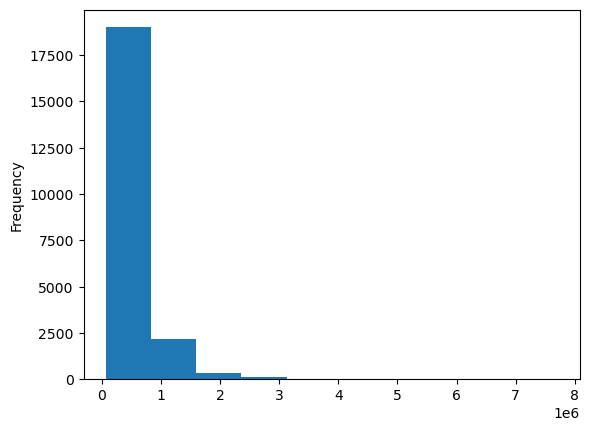

In [166]:
#distribution of target variable
data['Sale Price'].plot.hist()

In [167]:
# checking quantiles
q1 = data['Sale Price'].quantile(0.25)
q3 = data['Sale Price'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

## Handle ouliers

In [168]:
# imputing outliers
def limit_imputer(value):
  if value > upper_limit:
    return upper_limit
  if value < lower_limit:
    return lower_limit
  else:
    return value

In [169]:
data['Sale Price'] = data['Sale Price'].apply(limit_imputer)

<Axes: ylabel='Frequency'>

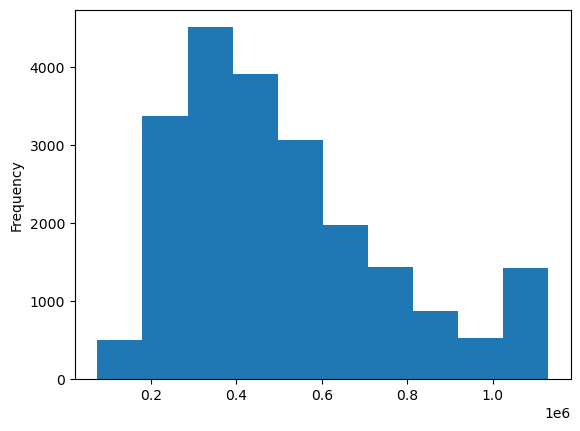

In [170]:
data['Sale Price'].plot.hist()

## Handle Null values

In [171]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [172]:
#imputing Null value base on median
numerical_columns = ['Sale Price','No of Bathrooms', 'Flat Area (in Sqft)','Lot Area (in Sqft)',
                     'Area of the House from Basement (in Sqft)','Latitude',
                     'Longitude','Living Area after Renovation (in Sqft)']

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [173]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [174]:
#imputing zipcode Null value based on most frequent
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(data['Zipcode'].values.reshape(-1,1))

In [175]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

# Feature Engineering

In [176]:
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [177]:
# converting from string to categorical
mapping = {'None' : "0",
           'Once' : '1',
           'Twice' : '2',
           'Thrice' : '3',
           'Four' : '4'}

data['No of Times Visited'] = data['No of Times Visited'].map(mapping)

In [178]:
data['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

##  Add New feature Ever Renovated, Years Since Renovation

In [179]:
data['Ever Renovated'] = np.where(data['Renovated Year'] == 0, 'No', 'Yes')

In [180]:
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year
data['Years Since Renovation'] = np.where(data['Ever Renovated'] == 'Yes',
                                                     abs(data['Purchase Year'] - 
                                                        data['Renovated Year']), 0)

In [181]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Years Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0


In [182]:
# dropping redundant variables
data.drop( columns = ['Purchase Year', 'Date House was Sold', 'Renovated Year'], inplace = True)

In [183]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


# Linear Regression

In [197]:
data.dropna(inplace=True)
X = data.drop(columns=['Sale Price'])
Y = data['Sale Price']

In [204]:
#checking distribution of independent numerical variables
def distribution(data ,var):
  plt.figure(figsize = (len(var)*6,6), dpi = 120)
  for j,i in enumerate(var):
    plt.subplot(1,len(var),j+1)
    plt.hist(data[i])
    plt.title(i)

In [205]:
numerical_columns = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']

In [206]:
for i in numerical_columns:
  X[i] = pd.to_numeric(X[i])

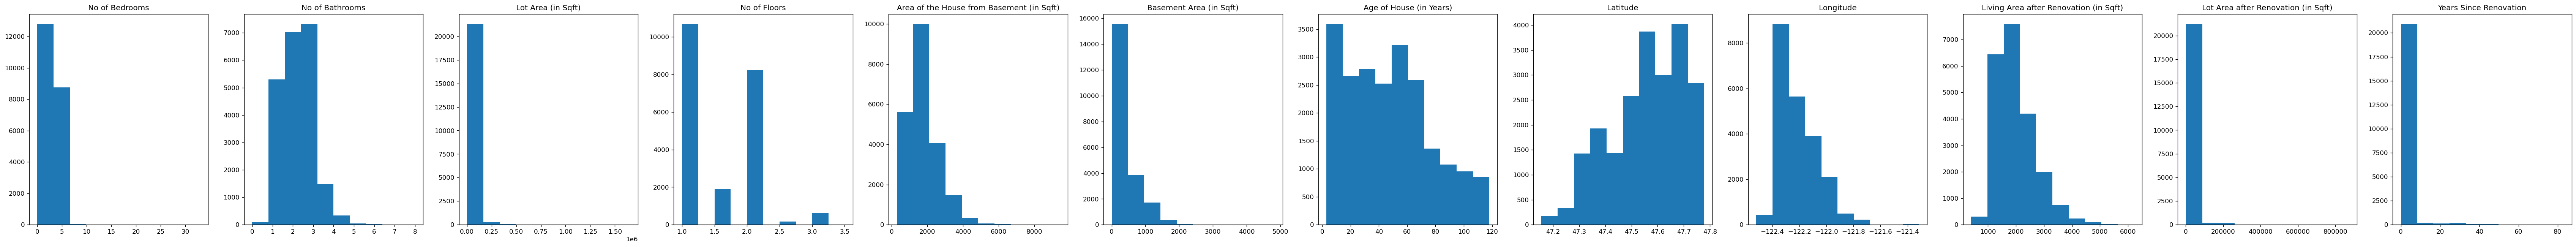

In [207]:
distribution(X, numerical_columns)

In [208]:
#removing right skew
def right_skew(x):
  return np.log(abs(x+500))

right_skew_variables = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
        'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']


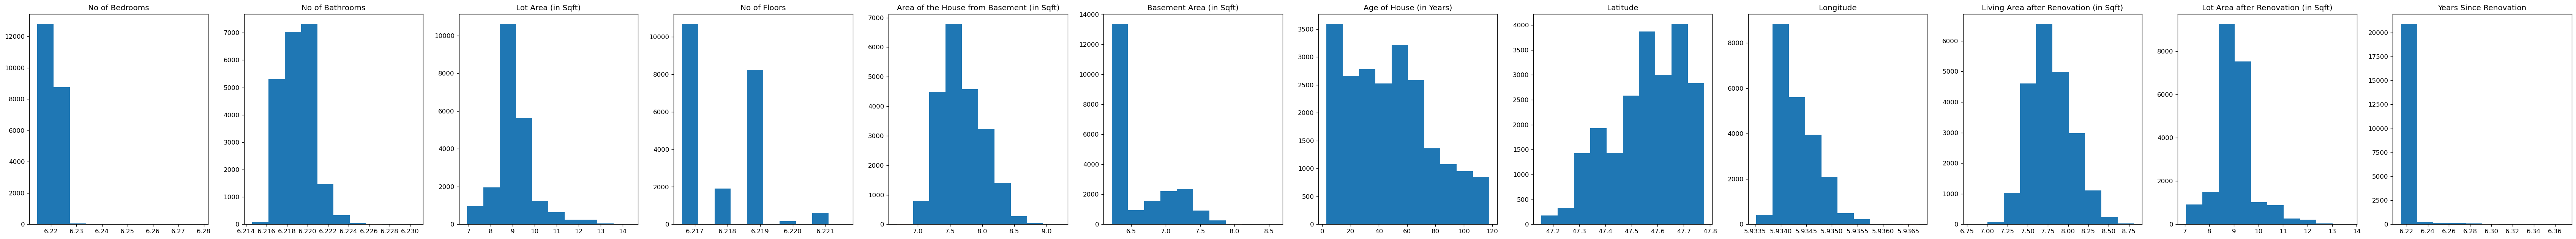

In [209]:
for i in right_skew_variables:
  X[i] = X[i].map(right_skew)

# removing infinite values
X = X.replace(np.inf, np.nan)
X.dropna(inplace=True)

distribution(X, numerical_columns)

##  Scaling the dataset

In [210]:
X["Waterfront View"] = X["Waterfront View"].map({    'No':0,'Yes':1 })

X['Condition of the House'] = X['Condition of the House'].map({'Bad':1,'Okay':2,'Fair':3,'Good':4,'Excellent':5})

X['Ever Renovated'] = X['Ever Renovated'].map({'No':0,'Yes':1})

X.head()

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,6.220590,6.216606,1180.0,8.724207,6.216606,0,0,3,7,7.426549,6.214608,63,98178.0,47.5112,5.934214,7.517521,8.724207,0,6.214608
1,6414100192,6.220590,6.219098,2570.0,8.954415,6.218600,0,0,3,7,7.889834,6.802395,67,98125.0,47.7210,5.934050,7.691657,9.004423,1,6.265301
2,5631500400,6.218600,6.216606,770.0,9.259131,6.216606,0,0,3,6,7.146772,6.214608,85,98028.0,47.7379,5.934278,8.077137,9.055089,0,6.214608
3,2487200875,6.222576,6.220590,1960.0,8.612503,6.216606,0,0,5,7,7.346010,7.251345,53,98136.0,47.5208,5.933854,7.528332,8.612503,0,6.214608
4,1954400510,6.220590,6.218600,1680.0,9.057189,6.216606,0,0,3,8,7.687080,6.214608,31,98074.0,47.6168,5.934775,7.740664,8.987572,0,6.214608


In [211]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale Price']
X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)
X.head()

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,0.886146,-0.398659,-1.449045,-0.979940,-0.411966,-0.915643,-0.087173,-0.305759,-0.629187,-0.564013,-0.767629,-0.726302,0.544898,1.870188,-0.352545,-0.305994,-1.027578,-0.416399,-0.210135,-0.168895
1,0.637511,-0.398659,0.176439,0.533757,-0.139344,0.936882,-0.087173,-0.305759,-0.629187,-0.564013,0.642046,0.538470,0.681079,0.879593,1.161615,-0.746421,-0.355981,-0.048217,4.758845,4.827571
2,0.365444,-1.477631,-1.449045,-1.426426,0.221513,-0.915643,-0.087173,-0.305759,-0.629187,-1.468651,-1.618929,-0.726302,1.293892,-0.933382,1.283585,-0.135525,1.130712,0.018356,-0.210135,-0.168895
3,-0.727656,0.678170,1.149789,-0.130528,-0.544251,-0.915643,-0.087173,-0.305759,2.444294,-0.564013,-1.012691,1.504499,0.204446,1.085188,-0.283260,-1.272186,-0.985883,-0.563170,-0.210135,-0.168895
4,-0.912881,-0.398659,-0.148334,-0.435445,-0.017634,-0.915643,-0.087173,-0.305759,-0.629187,0.340626,0.025111,-0.726302,-0.544548,-0.073620,0.409587,1.199436,-0.166972,-0.070357,-0.210135,-0.168895


## Checking and Removing Multicollinearity

In [212]:
X.corr()

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
ID,1.000000,0.001335,0.005201,-0.012388,-0.153964,0.018536,-0.002721,0.011592,-0.023783,0.013799,-0.003164,-0.003355,-0.021380,-0.008244,-0.001945,0.020798,-0.003009,-0.151059,-0.016943,-0.016309
No of Bedrooms,0.001335,1.000000,0.516698,0.577407,0.175392,0.175887,-0.006622,0.079605,0.028430,0.349718,0.509526,0.276582,-0.154678,-0.153067,-0.009043,0.129922,0.404696,0.154332,0.018535,-0.006745
No of Bathrooms,0.005201,0.516698,1.000000,0.754412,0.105028,0.500779,0.063674,0.187625,-0.124865,0.635681,0.696062,0.254012,-0.506179,-0.204094,0.024432,0.223285,0.572389,0.095827,0.050223,0.004633
Flat Area (in Sqft),-0.012388,0.577407,0.754412,1.000000,0.341621,0.354001,0.103837,0.284667,-0.058862,0.705666,0.853678,0.373323,-0.318063,-0.199393,0.052518,0.240144,0.739523,0.318629,0.055111,0.024553
Lot Area (in Sqft),-0.153964,0.175392,0.105028,0.341621,1.000000,-0.218638,0.074319,0.121722,0.066196,0.165780,0.319730,0.056380,-0.005926,-0.279293,-0.145961,0.376152,0.361692,0.917851,0.022813,0.033053
No of Floors,0.018536,0.175887,0.500779,0.354001,-0.218638,1.000000,0.023701,0.029442,-0.263775,0.461302,0.548171,-0.266736,-0.489307,-0.059188,0.049591,0.125498,0.277562,-0.210902,0.006280,-0.000408
Waterfront View,-0.002721,-0.006622,0.063674,0.103837,0.074319,0.023701,1.000000,0.401857,0.016653,0.070333,0.063290,0.063271,0.026161,0.030286,-0.014271,-0.041920,0.080572,0.083234,0.093294,0.105824
No of Times Visited,0.011592,0.079605,0.187625,0.284667,0.121722,0.029442,0.401857,1.000000,0.045990,0.223661,0.161094,0.249424,0.053440,0.084833,0.006166,-0.078429,0.268516,0.118811,0.104062,0.094630
Condition of the House,-0.023783,0.028430,-0.124865,-0.058862,0.066196,-0.263775,0.016653,0.045990,1.000000,-0.143700,-0.153583,0.176152,0.361417,0.003036,-0.014921,-0.106465,-0.090103,0.073440,-0.060139,-0.012107
Overall Grade,0.013799,0.349718,0.635681,0.705666,0.165780,0.461302,0.070333,0.223661,-0.143700,1.000000,0.723687,0.116117,-0.456629,-0.185827,0.111298,0.201776,0.676756,0.167528,0.010015,-0.023469


In [213]:
## pair of independent variables with correlation greater than 0.5
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bedrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade',

### Calculating VIF

In [214]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X[:]

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

ID                                            1.043008
No of Bedrooms                                1.736931
No of Bathrooms                               3.425048
Flat Area (in Sqft)                          21.519695
Lot Area (in Sqft)                            6.873686
No of Floors                                  2.396444
Waterfront View                               1.211042
No of Times Visited                           1.416761
Condition of the House                        1.260963
Overall Grade                                 2.906106
Area of the House from Basement (in Sqft)    23.307722
Basement Area (in Sqft)                       6.563899
Age of House (in Years)                       2.458999
Zipcode                                       1.668729
Latitude                                      1.192310
Longitude                                     1.890580
Living Area after Renovation (in Sqft)        2.917774
Lot Area after Renovation (in Sqft)           6.614098
Ever Renov

In [215]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 8:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [216]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Area of the House from Basement (in Sqft) has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,0.886146,-0.398659,-1.449045,-0.979940,-0.411966,-0.915643,-0.087173,-0.305759,-0.629187,-0.564013,-0.726302,0.544898,1.870188,-0.352545,-0.305994,-1.027578,-0.416399,-0.210135,-0.168895
1,0.637511,-0.398659,0.176439,0.533757,-0.139344,0.936882,-0.087173,-0.305759,-0.629187,-0.564013,0.538470,0.681079,0.879593,1.161615,-0.746421,-0.355981,-0.048217,4.758845,4.827571
2,0.365444,-1.477631,-1.449045,-1.426426,0.221513,-0.915643,-0.087173,-0.305759,-0.629187,-1.468651,-0.726302,1.293892,-0.933382,1.283585,-0.135525,1.130712,0.018356,-0.210135,-0.168895
3,-0.727656,0.678170,1.149789,-0.130528,-0.544251,-0.915643,-0.087173,-0.305759,2.444294,-0.564013,1.504499,0.204446,1.085188,-0.283260,-1.272186,-0.985883,-0.563170,-0.210135,-0.168895
4,-0.912881,-0.398659,-0.148334,-0.435445,-0.017634,-0.915643,-0.087173,-0.305759,-0.629187,0.340626,-0.726302,-0.544548,-0.073620,0.409587,1.199436,-0.166972,-0.070357,-0.210135,-0.168895


## Train/Test set

In [218]:
X = vif_data[:]
Y = data['Sale Price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15129, 19), (6484, 19), (15129,), (6484,))

## Training model

In [219]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [220]:
lr.coef_

array([ -2857.92857327, -13208.90989571,  16339.42192617,  85439.68018863,
         5603.22045824,  13027.19669001,  10171.75031612,  27882.75895671,
        17534.88470705,  88054.92251957,  -4275.09887347,  56112.20338461,
       -16660.279491  ,  77536.30977645, -10417.38252802,  35293.92142946,
       -15329.71330438,  16150.80695075, -11899.77258421])

In [221]:
predictions = lr.predict(x_test)
lr.score(x_test, y_test)

0.75341419565034